In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.__version__
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__

'0.8.1'

In [2]:
flights = sns.load_dataset("flights")

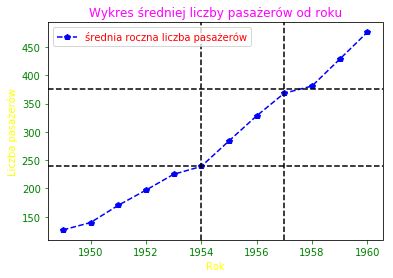

In [41]:
sredniPasazerowie = flights["passengers"].groupby(flights["year"]).agg(np.mean)
ax = plt.subplot()
ax.plot(sredniPasazerowie.index, sredniPasazerowie.values, "bp--", label = "średnia roczna liczba pasażerów") # kolejno: x, y, format
l = ax.legend()
for text in l.get_texts():
    text.set_color("red")


# ax.axis('equal')
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

ax.set_xlabel("Rok", color="yellow")
ax.set_ylabel("Liczba pasażerów", color="yellow")

# ax.yaxis.label.set_color('yellow') 
# ax.xaxis.label.set_color('yellow')
# ax.title.set_color("yellow")

ax.set_title("Wykres średniej liczby pasażerów od roku", color="magenta")

# ax.set_facecolor("azure")
# ax.grid(False)
ax.axhline(y=240, color='k', linestyle="--")
ax.axhline(y=375, color='k', linestyle="--")
ax.axvline(x=1954, color='k', linestyle="--")
ax.axvline(x=1957, color='k', linestyle="--")

ax.set_facecolor("white")
#ax.grid(True, linestyle='--', linewidth=1, color="black")
ax.grid(False, which='both')


plt.show()

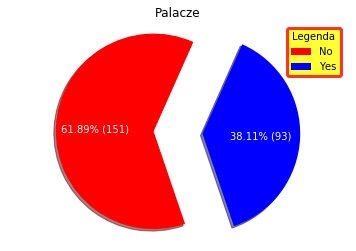

In [31]:
tips = sns.load_dataset("tips")
smoker = tips.smoker.value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
#         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return f'{pct:.2f}% ({val:d})'
    return my_autopct

plt.pie(smoker.values,
        textprops={"color":"white"},
        labels=smoker.index,
        colors=["r","b"],
        shadow=True,
        startangle=66,
        explode=(0.2,0.3),
        autopct=make_autopct(smoker.values)) #autopct="%1.2f%%"
plt.axis("equal")
leg = plt.legend(title="Legenda", frameon=True)
# leg = plt.legend()
leg.get_frame().set_edgecolor('r')
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_facecolor("yellow")
plt.title("Palacze")
plt.show()

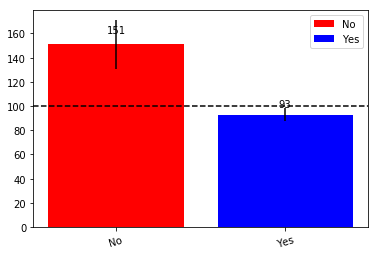

In [44]:
ax = plt.subplot()
rects = ax.bar([1,2], smoker.values,color=["red", "blue"], yerr=(20,5))
ax.set_xticks([1,2])
ax.set_xticklabels(smoker.index , rotation=17)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects)
# ax.title("Udział palaczy")
# ax.ylabel("liczność")
# plt.legend()
ax.legend(rects, ("No", "Yes"))
ax.set_facecolor("white")
ax.grid(True, linestyle='--', linewidth=1, color="gray")

ax.grid(False)
ax.axhline(y=100, color='k', linestyle="--")

plt.show()

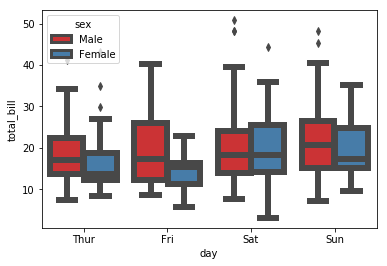

In [45]:
tips = sns.load_dataset("tips")
sns.boxplot(tips["day"],
            tips["total_bill"],
            tips["sex"],
            palette="Set1",
            linewidth=6)
plt.show()

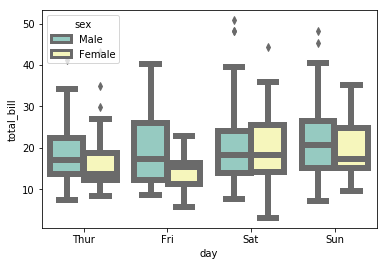

In [46]:
tips = sns.load_dataset("tips")
sns.boxplot(tips["day"],
            tips["total_bill"],
            tips["sex"],
            palette="Set3",
            linewidth=6)
plt.show()

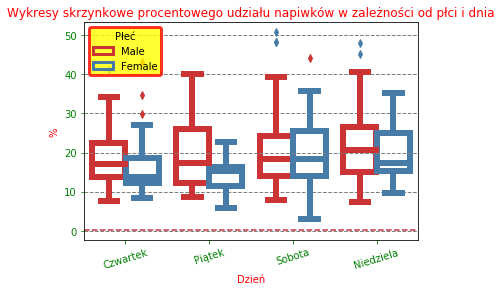

In [49]:
ax = plt.subplot()
ax.set_facecolor("white")
ax.grid(True, linestyle='--', linewidth=1, color="gray")

# ax.grid(False)
ax.axhline(y=0.2, color='k', linestyle="--")
#sns.boxplot(tips["day"], tips["tip_frac"], tips["sex"], palette=["0.95", "0.65"])

# sns.boxplot(tips["day"], tips["tip_frac"], tips["sex"], palette=["red", "blue"], linewidth=6)
sns.boxplot(tips["day"], tips["total_bill"], tips["sex"], palette="Set1", linewidth=6)


#ax.set_xticks([1,2])
ax.set_xticklabels(["Czwartek", "Piątek", "Sobota", "Niedziela"] , rotation=17)

ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

ax.set_xlabel("Dzień")
ax.set_ylabel("%")

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')
ax.title.set_color("red")

ax.set_title("Wykresy skrzynkowe procentowego udziału napiwków w zależności od płci i dnia")


for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

leg = plt.legend(title="Płeć", frameon=True)
# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')


# leg = plt.legend()
leg.get_frame().set_edgecolor('r')
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_facecolor("yellow")

plt.show()

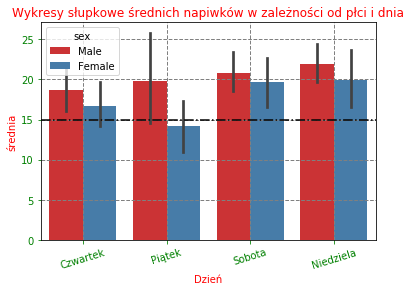

In [50]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set1")

ax.grid(True, linestyle='--', linewidth=1, color="gray")

# ax.grid(False)
ax.axhline(y=15, color='k', linestyle="-.")

#ax.set_xticks([1,2])
ax.set_xticklabels(["Czwartek", "Piątek", "Sobota", "Niedziela"] , rotation=17)

ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

ax.set_xlabel("Dzień")
ax.set_ylabel("średnia")

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')
ax.title.set_color("red")

ax.set_title("Wykresy słupkowe średnich napiwków w zależności od płci i dnia")

plt.show()